# Evaluate Systematic Literature Results

## Prepare the environment

In [1]:
# Import required packages
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
# Load data
coding = pd.read_excel("../data/external/literature_review_information.xlsx")
references = pd.read_csv("../data/external/references.csv")

## Define functions

In [3]:
# Define helper function to show values of coded variables
def elements(df, column, split = ","):
    try:
        element_list = [element.split(f"{split}") for element in df[column].values.tolist() if type(element) is not float]
        # Strip whitespaces
        element_list_clean = [element.strip() for element_string in element_list for element in element_string]
        return pd.DataFrame({"Criteria":element_list_clean}).groupby("Criteria").size().sort_values(ascending = False)
    except KeyError:
        print(f"Available columns are: {df.columns}")

## Prepare data

In [4]:
# Select the relevant subset of bibliographic information
references_subset = references[['Item Type', 'Publication Year', 'Author', 'Title','Publication Title', 'Extra']]

In [5]:
# Merge extracted knowledge and bibliographic data
data = pd.merge(coding, references_subset, how = "left", left_on="title", right_on="Title")

In [6]:
# Replace names for graphs
data.replace({"journalArticle": "Journal Article", "conferencePaper": "Conference Proceeding"}, inplace = True)

In [7]:
# Convert data types
data["Processing time"] = data["Processing time"] == "True"
data["Unforeseen events"] = data["Unforeseen events"] == "True"
data["Setup Time"] = data["Setup Time"] == "True"

## Bibliographic analysis

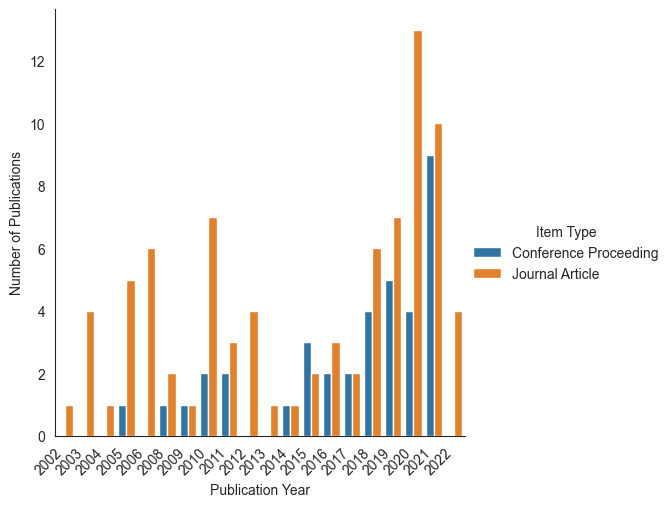

In [8]:
# Plot types of articles in course of time
sns.set_style('white')
plot = sns.catplot(
    data=data, x="Publication Year", hue="Item Type", kind="count",
)
plot.set_ylabels("Number of Publications")
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.savefig('../reports/figures/publications_per_year_per_categories.png')

In [9]:
# Analyse the number of articles published in journals and in conference proceedings
data.groupby("Item Type").size()

Item Type
Conference Proceeding    37
Journal Article          83
dtype: int64

In [10]:
# Analyse the number of different journals and conferences
# For conference proceeding we had to manually analyse the publications as they were not named the same as each conference has different names
data.groupby("Item Type")['Publication Title'].nunique()

Item Type
Conference Proceeding    37
Journal Article          39
Name: Publication Title, dtype: int64

In [11]:
# Analyse the most published journals
data[data["Item Type"] == "Journal Article"].groupby('Publication Title').size().sort_values(ascending = False).head(15)

Publication Title
International Journal of Production Research                      9
Robotics and Computer-Integrated Manufacturing                    7
Procedia CIRP                                                     7
The International Journal of Advanced Manufacturing Technology    6
Computers & Industrial Engineering                                6
Journal of Intelligent Manufacturing                              5
IEEE Access                                                       4
Engineering Applications of Artificial Intelligence               3
Journal of Manufacturing Systems                                  3
Journal of Scheduling                                             2
European Journal of Operational Research                          2
Applied Soft Computing                                            2
Journal of Physics: Conference Series                             1
International Journal of Computer Integrated Manufacturing        1
Neurocomputing                

In [12]:
# Analyse the most published conferences
data[data["Item Type"] == "Conference Proceeding"]["Publication Title"].to_list()

['IEEE 20th Conference on Emerging Technologies & Factory Automation (ETFA)',
 'Studies in Computational Intelligence',
 'ICANN 2019: Theoretical Neural Computation',
 'International Conference on Learning and Intelligent Optimization',
 'IEEE 4th Advanced Information Management, Communicates, Electronic and Automation Control Conference (IMCEC)',
 '2020 IEEE 16th International Conference on Automation Science and Engineering (CASE)',
 '2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence)',
 '13th IEEE Conference on Automation Science and Engineering (CASE)',
 'Tenth International Conference on Intelligent Computing and Information Systems (ICICIS)',
 '2019 IEEE 15th International Conference on Automation Science and Engineering (CASE)',
 'Chinese Control Conference, CCC',
 '29th Annual SEMI Advanced Semiconductor Manufacturing Conference',
 'Advances in Production Management Systems. Artificial Intelligence for Sustainable and

In [13]:
# Analyse the most publishing authors
elements(data, "Author", split = ";").head(15)

Criteria
Shiue, Yeou-Ren             9
Ma, Yumin                   6
Qiao, Fei                   5
Qu, Shuhui                  5
Su, Chao-Ton                4
Wang, Jie                   4
Martínez-Jiménez, Yailen    4
Heger, Jens                 4
Scholz-Reiter, Bernd        3
Jacob, Varghese S.          3
Priore, Paolo               3
Nowé, Ann                   3
Tang, Dunbing               3
Zhang, Zhicong              3
Puente, Javier              3
dtype: int64

In [14]:
# Analyse number of articles per publisher
data.groupby("Extra").size()

Extra
IEEE Xplore                36
Other                       7
PubsOnLine                  2
ScienceDirect              40
Springer Link              22
Taylor & Francis Online    12
Wiley Online Library        1
dtype: int64

## Analyse results of review

### Approaches

In [15]:
# Check number of approaches
data.rename(columns={"approach_category": "Category"}, inplace = True)
elements(data, "Category")

Criteria
Select dispatching rules    56
Directly assign jobs        48
Other                       16
dtype: int64

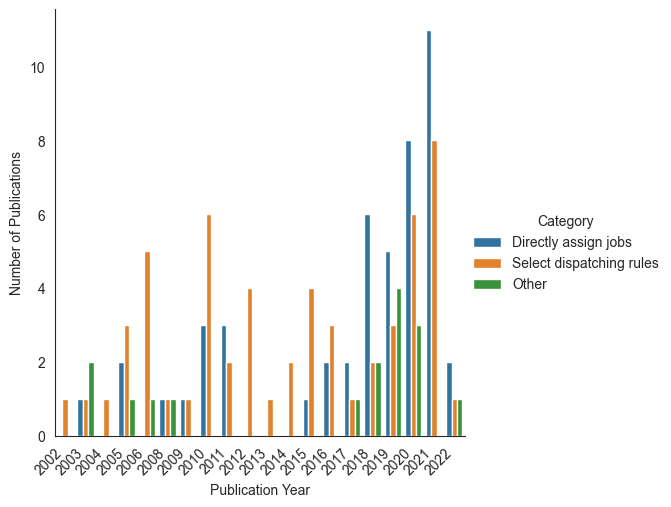

In [16]:
# Plot number of articles for each approach
sns.set_style('white')
plot = sns.catplot(
    data=data, x="Publication Year", hue="Category", kind="count",
)
plot.set_ylabels("Number of Publications")
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.savefig('../reports/figures/publications_per_year_per_approach.png')

### Scheduling problems

In [17]:
# Analyse of the scheduling problem categories
elements(data, "Scheduling Problem").head(10)

Criteria
Job Shop                                           39
Flexible Job Shop                                  29
Flow Shop                                          18
Unrelated parallel machines                         7
Reentrant Flow Shop                                 6
Flexible Flow Shop                                  5
Single Machine                                      5
Identical parallel machines                         2
Resource-Constrained Project Scheduling Problem     1
Uniform parallel machines                           1
dtype: int64

In [18]:
# Analyse the optimization goals of the problems
elements(data, "Optimization Goal")

Criteria
Makespan                                46
Throughput                              22
Mean tardiness                          15
Tardiness                               12
Costs                                   12
Mean cycle time                         11
Number of tardy parts                   10
Mean flow time                           9
Weighted tardiness                       5
Resource utilization                     5
Maximum lateness                         3
Production rate                          3
Flow time                                3
False                                    3
Equipment effiency                       2
Uptime utilization                       2
Cycle time                               2
Productivity                             2
Work in progress                         2
Percentage of tardy parts                2
Total movement of  wafer                 1
Product waiting for acceptance           1
Variance of mean cycle time              1
Re

In [19]:
# Get number of optimization goals
number_of_metrics = [len(element.split(", ")) for element in data["Optimization Goal"].values.tolist() if type(element) is not float]
counter = collections.Counter(number_of_metrics)
print(counter)

Counter({1: 74, 2: 21, 3: 14, 4: 8, 5: 1})


In [20]:
# Prepare data for visualization for problem aspects
heatmap_setup_columns = ["Scheduling Problem", "Processing time", "Unforeseen events",
                         "Dynamic vs Static", "Setup Time"]
slr_heatmap_setup = data[heatmap_setup_columns].dropna()
# Only use frequently occurring problems
slr_heatmap_setup = slr_heatmap_setup[~slr_heatmap_setup["Scheduling Problem"].isin(["Resource-Constrained Project Scheduling Problem", "Uniform parallel machines", "Identical parallel machines"])]
slr_heatmap_setup["sort"] = slr_heatmap_setup['Scheduling Problem'].replace({'Flexible Job Shop':0, 'Job Shop':1, 'Flexible Flow Shop':2, 'Reentrant Flow Shop':3, 'Flow Shop': 4, 'Unrelated parallel machines': 5, 'Single Machine':6})
# Colour by relative frequency and show absolute numbers
vis_data = slr_heatmap_setup.groupby("Scheduling Problem").mean().sort_values("sort").drop("sort", axis = 1)
vis_description = slr_heatmap_setup.groupby("Scheduling Problem").sum().drop("sort", axis = 1).reset_index()
vis_description["sort"] = vis_description["Scheduling Problem"].replace({'Flexible Job Shop':0, 'Job Shop':1, 'Flexible Flow Shop':2, 'Reentrant Flow Shop':3, 'Flow Shop': 4, 'Unrelated parallel machines': 5, 'Single Machine':6})
vis_description = vis_description.sort_values("sort").drop("sort", axis = 1)
vis_description.set_index("Scheduling Problem", inplace=True)

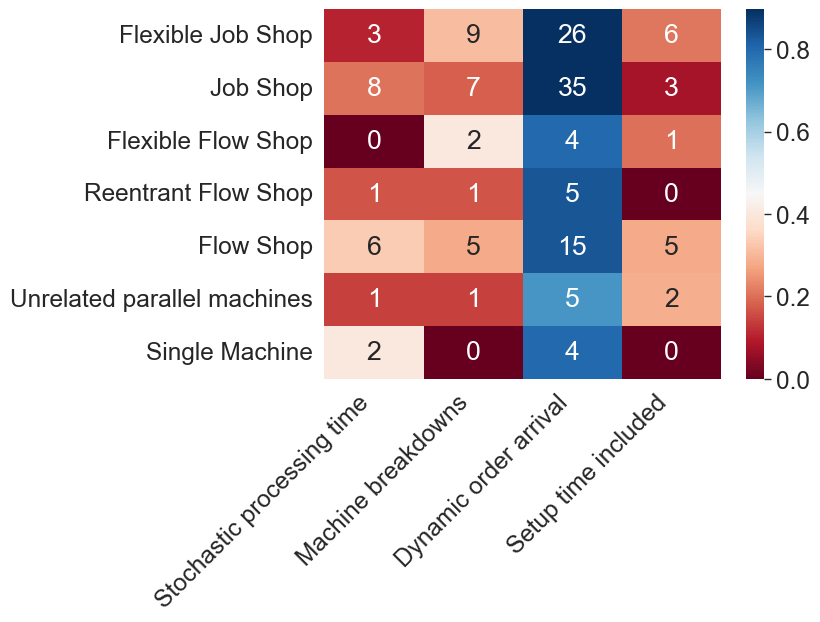

In [21]:
# Visualize heatmap
plt.figure()
sns.set_style('white')
sns.set_context('paper', font_scale = 2)
ax = sns.heatmap(vis_data,
                 cmap='RdBu', annot = vis_description)
ax.set_ylabel('')
ax.set_xticklabels(["Stochastic processing time", "Machine breakdowns", "Dynamic order arrival", "Setup time included"], rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
plt.savefig("../reports/figures/heatmap_per_setup.png", bbox_inches='tight')

### Dispatching rules

In [22]:
# Show often used dispatching rules
elements(data, "Priority rule").head(15)

Criteria
False          58
SPT            43
EDD            29
FIFO           27
SRPT           22
LPT            15
CR             14
DS             12
MDD            10
SIO             7
MOD             6
Custom rule     5
ATC             4
LRPT            3
LIFO            3
dtype: int64

In [23]:
# Show often used allocation rules
elements(data, "Allocation rule").head(10)

Criteria
False                         102
LUS                             9
SPT                             9
WINQ                            3
NINQ                            3
NLR                             2
SQ                              2
Earliest available machine      2
WMDD                            2
WCOVERT                         2
dtype: int64

### Machine learning techniques

In [24]:
# Show often used machine learning techniques
elements(data, "Machine learning algorithm").head(10)

Criteria
ANN                             28
Deep Q-Learning                 27
Q-Learning                      19
DT                              12
SVM                              9
SOM                              8
RF                               4
Proximal Policy Optimization     4
ELM                              4
KNN                              3
dtype: int64

In [25]:
# Show prominent machine learning evaluation metrics
elements(data, "Machine learning evaluation").head(10)

Criteria
Custom reward function                                         57
Accuracy                                                       23
Optimality Gap                                                  5
Custom metric                                                   5
False                                                           4
MSE                                                             3
Difference of predicted chosen rule to optimal rule in time     2
RMSE                                                            2
AUC                                                             1
Scheduling Satisfaction                                         1
dtype: int64

For more analysis literature_review_information.xlsx can be used directly. It includes additional information for each article and all coded information.